In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')



# Creating a Spline

Create a spline/polyline from a numpy array of XYZ vertices


In [11]:
# sphinx_gallery_thumbnail_number = 2
import pyvista as pv
import numpy as np
pv.rcParams['use_ipyvtk'] = True

Create a dataset to plot



In [3]:
def make_points():
    """Helper to make XYZ points"""
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
    z = np.linspace(-2, 2, 100)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))

points = make_points()
points[0:5, :]

array([[ 2.44929360e-15,  5.00000000e+00, -2.00000000e+00],
       [ 1.21556036e+00,  4.68488752e+00, -1.95959596e+00],
       [ 2.27700402e+00,  4.09249671e+00, -1.91919192e+00],
       [ 3.12595020e+00,  3.27840221e+00, -1.87878788e+00],
       [ 3.72150434e+00,  2.30906573e+00, -1.83838384e+00]])

Now let's make a function that can create line cells on a
:class:`pyvista.PolyData` mesh given that the points are in order for the
segments they make.



In [4]:
def lines_from_points(points):
    """Given an array of points, make a line set"""
    poly = pv.PolyData()
    poly.points = points
    cells = np.full((len(points)-1, 3), 2, dtype=np.int_)
    cells[:, 1] = np.arange(0, len(points)-1, dtype=np.int_)
    cells[:, 2] = np.arange(1, len(points), dtype=np.int_)
    poly.lines = cells
    return poly


line = lines_from_points(points)
line

PolyData (0x139796b7b80)
  N Cells:	99
  N Points:	100
  X Bounds:	-4.084e+00, 4.084e+00
  Y Bounds:	-3.281e+00, 5.000e+00
  Z Bounds:	-2.000e+00, 2.000e+00
  N Arrays:	0

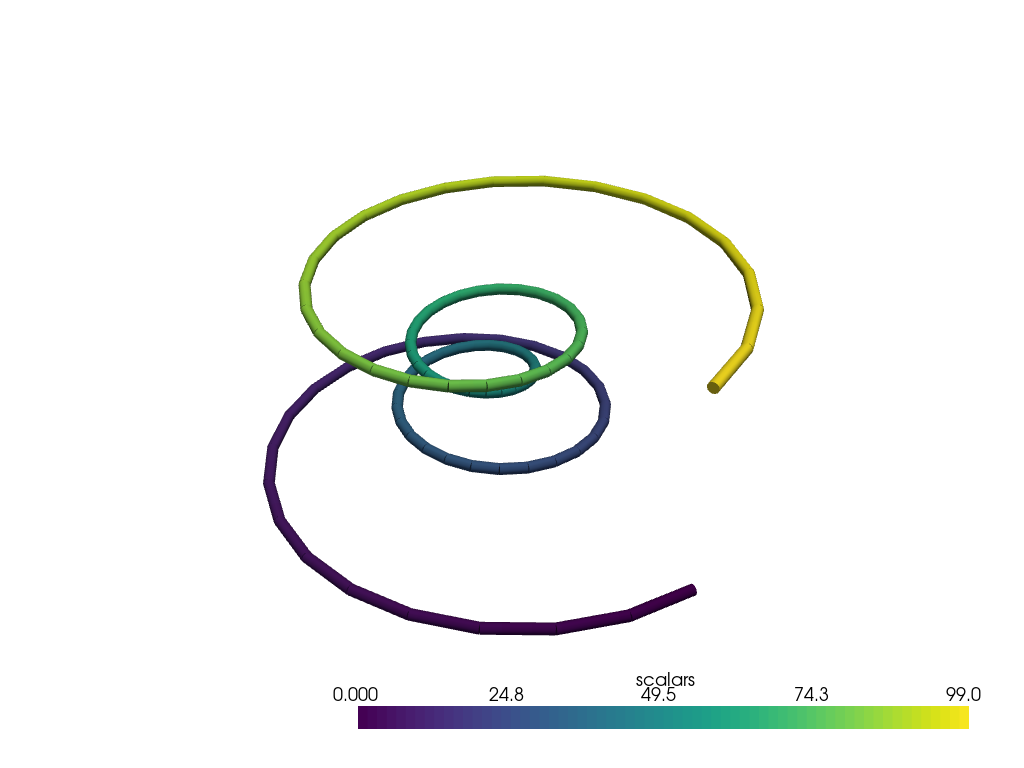

In [12]:
line["scalars"] = np.arange(line.n_points)
tube = line.tube(radius=0.1)
tube.plot(smooth_shading=True)

That tube has sharp edges at each line segment. This can be mitigated by
creating a single PolyLine cell for all of the points



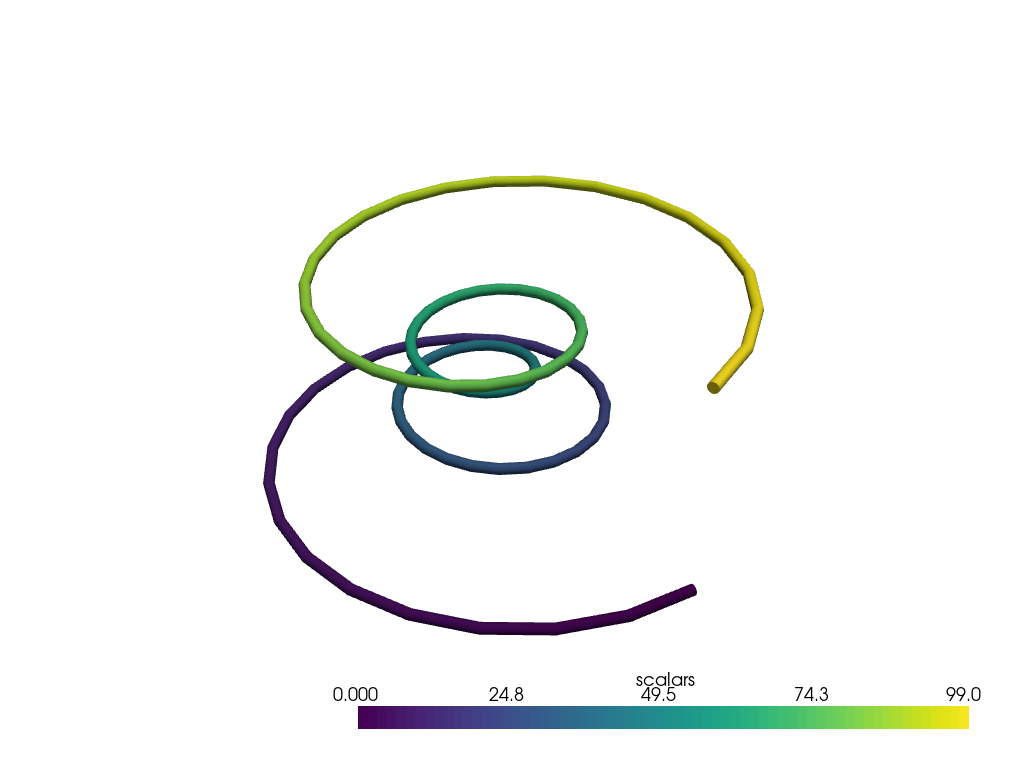

In [13]:
def polyline_from_points(points):
    poly = pv.PolyData()
    poly.points = points
    the_cell = np.arange(0, len(points), dtype=np.int_)
    the_cell = np.insert(the_cell, 0, len(points))
    poly.lines = the_cell
    return poly

polyline = polyline_from_points(points)
polyline["scalars"] = np.arange(polyline.n_points)
tube = polyline.tube(radius=0.1)
tube.plot(smooth_shading=True)

You could also interpolate those points onto a parametric spline



In [7]:
# Create spline with 1000 interpolation points
spline = pv.Spline(points, 1000)

Plot spline as a tube



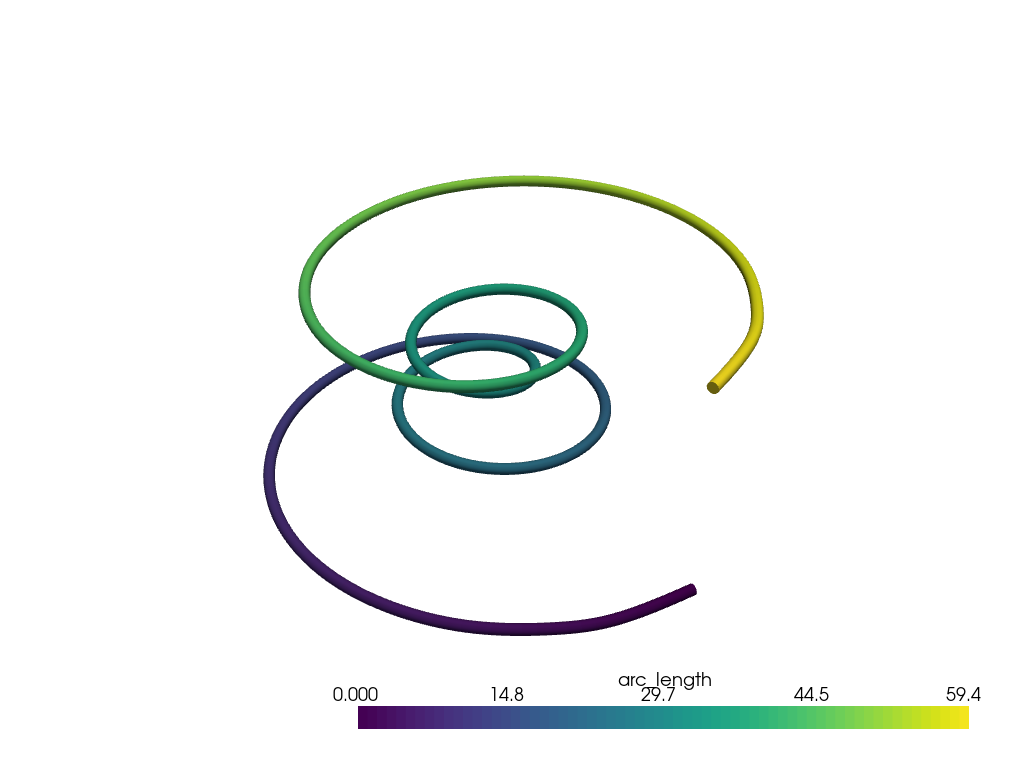

In [14]:
# add scalars to spline and plot it
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.1)
tube.plot(smooth_shading=True)

The spline can also be plotted as a plain line



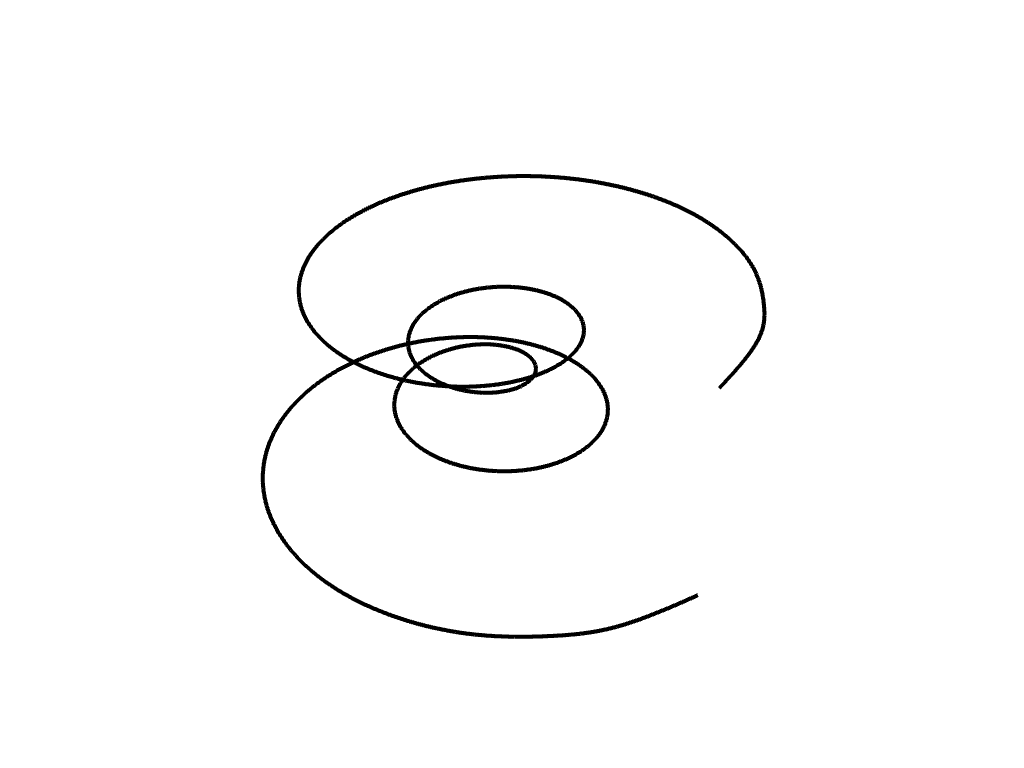

In [9]:
# generate same spline with 400 interpolation points
spline = pv.Spline(points, 400)

# plot without scalars
spline.plot(line_width=4, color="k")

## Ribbons

Ayy of the lines from the examples above can be used to create ribbons.
Take a look at the :func:`pyvista.PolyDataFilters.ribbon` filter.



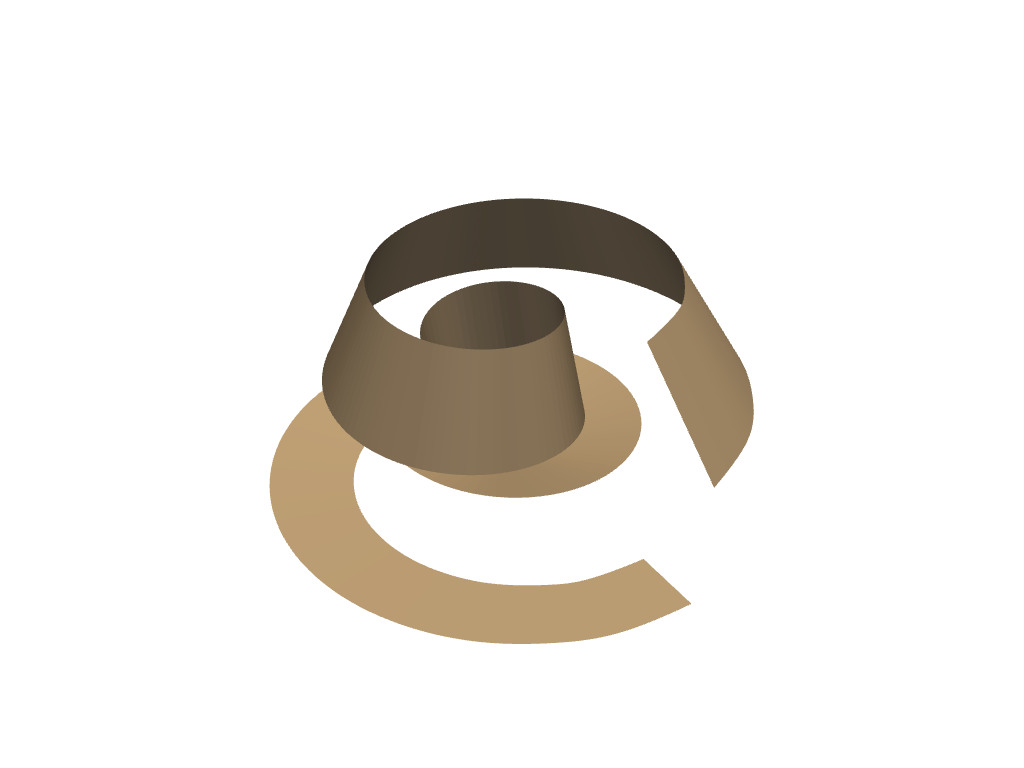

In [10]:
ribbon = spline.compute_arc_length().ribbon(width=0.75, scalars='arc_length')
ribbon.plot(color=True)

In [20]:
import pyvista as pv

# create a mesh and identify some scalars you wish to plot
mesh = pv.Sphere()
z = mesh.points[:, 2]

# Plot using the ITKplotter
pv.plot_itk(mesh, scalars=z, smooth_shading=False)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…